In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import sys
import pandas as pd
import numpy as np
import plotly.express as px
import plotly as py
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from PIL import Image

import pandas as pd
from pathlib import Path

import calendar
!pip install termcolor
from termcolor import colored
from IPython.display import HTML

import warnings
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

**Exploring data and preprocessing**

In [ ]:
df= pd.read_csv("/content/gdrive/MyDrive/Analytics_Project_2/Base/Customers_Train.csv")
df

,EventID,EventType,ProductID,ProductName,Quantity,EventDateTime,UnitPrice,UserID
0,612890,Purchased,97393,DIWALI LANTERN WITH CARDBOARD,32,2019-12-01 07:45:00,624.80,25430
1,612890,Purchased,91668P,FLOWER POTS WITH FLOWER,32,2019-12-01 07:45:00,607.40,25430
2,612890,Purchased,91668W,RED COLORED LIGHTS,32,2019-12-01 07:45:00,607.40,25430
3,612890,Purchased,34386,PHOTO FRAME,68,2019-12-01 07:45:00,197.85,25430
4,612890,Purchased,33577,FUNNY HAT,44,2019-12-01 07:45:00,123.90,25430
...,...,...,...,...,...,...,...,...
417529,661627,Purchased,34616,FELTCRAFT DOLL ROSIE,12,2020-12-09 20:01:00,271.80,29875
417530,661627,Purchased,35095,FELTCRAFT PRINCESS LOLA DOLL,11,2020-12-09 20:01:00,341.40,29875
417531,661627,Purchased,35096,FELTCRAFT PRINCESS OLIVIA DOLL,11,2020-12-09 20:01:00,341.40,29875
417532,661627,Purchased,33315,PINK FLORAL FELTCRAFT SHOULDER BAG,12,2020-12-09 20:01:00,341.40,29875


In [ ]:
df.head()

,EventID,EventType,ProductID,ProductName,Quantity,EventDateTime,UnitPrice,UserID
0,612890,Purchased,97393,DIWALI LANTERN WITH CARDBOARD,32,2019-12-01 07:45:00,624.80,25430
1,612890,Purchased,91668P,FLOWER POTS WITH FLOWER,32,2019-12-01 07:45:00,607.40,25430
2,612890,Purchased,91668W,RED COLORED LIGHTS,32,2019-12-01 07:45:00,607.40,25430
3,612890,Purchased,34386,PHOTO FRAME,68,2019-12-01 07:45:00,197.85,25430
4,612890,Purchased,33577,FUNNY HAT,44,2019-12-01 07:45:00,123.90,25430


In [ ]:
df.tail()

,EventID,EventType,ProductID,ProductName,Quantity,EventDateTime,UnitPrice,UserID
417529,661627,Purchased,34616,FELTCRAFT DOLL ROSIE,12,2020-12-09 20:01:00,271.80,29875
417530,661627,Purchased,35095,FELTCRAFT PRINCESS LOLA DOLL,11,2020-12-09 20:01:00,341.40,29875
417531,661627,Purchased,35096,FELTCRAFT PRINCESS OLIVIA DOLL,11,2020-12-09 20:01:00,341.40,29875
417532,661627,Purchased,33315,PINK FLORAL FELTCRAFT SHOULDER BAG,12,2020-12-09 20:01:00,341.40,29875
417533,661627,Purchased,34276,JUMBO STORAGE BAG SUKI,12,2020-12-09 20:01:00,184.80,29875


In [ ]:
df.shape

(417534, 8)

In [ ]:
df.isnull().sum()

EventID          0
EventType        0
ProductID        0
ProductName      0
Quantity         0
EventDateTime    0
UnitPrice        0
UserID           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417534 entries, 0 to 417533
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   EventID        417534 non-null  object 
 1   EventType      417534 non-null  object 
 2   ProductID      417534 non-null  object 
 3   ProductName    417534 non-null  object 
 4   Quantity       417534 non-null  int64  
 5   EventDateTime  417534 non-null  object 
 6   UnitPrice      417534 non-null  float64
 7   UserID         417534 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 25.5+ MB


In [ ]:
df["EventDateTime"] = pd.to_datetime(df["EventDateTime"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417534 entries, 0 to 417533
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   EventID        417534 non-null  object        
 1   EventType      417534 non-null  object        
 2   ProductID      417534 non-null  object        
 3   ProductName    417534 non-null  object        
 4   Quantity       417534 non-null  int64         
 5   EventDateTime  417534 non-null  datetime64[ns]
 6   UnitPrice      417534 non-null  float64       
 7   UserID         417534 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 25.5+ MB


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,Quantity,EventDateTime,UnitPrice,UserID
count,417534.00,417534,417534.00,417534.00
mean,26.16,2020-06-30 20:42:57.578065152,354.09,27705.65
min,-9350.00,2019-12-01 07:45:00,15.15,24691.00
25%,12.00,2020-03-26 11:26:00,123.90,26328.00
50%,14.00,2020-07-08 19:12:00,184.80,27656.00
75%,32.00,2020-10-14 14:08:00,341.40,29144.00
max,19172.00,2020-12-09 20:01:00,2184684.98,30632.00
std,102.01,NaN,6188.58,1680.81


In [ ]:


df[df['Quantity'] < 0]

,EventID,EventType,ProductID,ProductName,Quantity,EventDateTime,UnitPrice,UserID
178,R612905,Returned,34432,PAPER BUNTING WHITE LACE,-2,2019-12-01 10:33:00,271.80,28666
182,R612905,Returned,34428,PAPER CHAIN KIT RETRO SPOT,-2,2019-12-01 10:33:00,271.80,28666
183,R612905,Returned,34216,MOBILE CASE,-2,2019-12-01 10:33:00,123.90,28666
184,R612905,Returned,97291,ANTIQUE SILVER TEA GLASS ETCHED,-2,2019-12-01 10:33:00,123.90,28666
185,R612905,Returned,97315S,HANGING HEART ZINC T-LIGHT HOLDER,-14,2019-12-01 10:33:00,89.10,28666
...,...,...,...,...,...,...,...,...
417027,R661556,Returned,97143A,PINK FOXGLOVE ARTIIFCIAL FLOWER,-2,2020-12-09 15:00:00,237.00,28924
417100,R661566,Returned,33577,FUNNY HAT,-134,2020-12-09 15:24:00,107.37,29652
417101,R661567,Returned,34175,ASSORTED CREEPY CRAWLIES,-14,2020-12-09 15:24:00,51.69,30295
417123,R661571,Returned,34578,JIGSAW RABBIT AND BIRDHOUSE,-2,2020-12-09 15:30:00,158.70,29162


In [ ]:
previous_purchases=df["UserID"].value_counts()
previous_purchases

UserID
27256    5710
30186    5114
26951    3927
26501    2710
25093    2665
         ... 
30519       1
27172       1
29990       1
28788       1
25567       1
Name: count, Length: 4383, dtype: int64

In [ ]:
unique_event_types = df['EventType'].unique()
unique_event_types

array(['Purchased', 'Returned'], dtype=object)

In [ ]:
df['EncodedEventType'] = df['EventType'].map({'Returned': 0, 'Purchased': 1})
df

,EventID,EventType,ProductID,ProductName,Quantity,EventDateTime,UnitPrice,UserID,EncodedEventType
0,612890,Purchased,97393,DIWALI LANTERN WITH CARDBOARD,32,2019-12-01 07:45:00,624.80,25430,1
1,612890,Purchased,91668P,FLOWER POTS WITH FLOWER,32,2019-12-01 07:45:00,607.40,25430,1
2,612890,Purchased,91668W,RED COLORED LIGHTS,32,2019-12-01 07:45:00,607.40,25430,1
3,612890,Purchased,34386,PHOTO FRAME,68,2019-12-01 07:45:00,197.85,25430,1
4,612890,Purchased,33577,FUNNY HAT,44,2019-12-01 07:45:00,123.90,25430,1
...,...,...,...,...,...,...,...,...,...
417529,661627,Purchased,34616,FELTCRAFT DOLL ROSIE,12,2020-12-09 20:01:00,271.80,29875,1
417530,661627,Purchased,35095,FELTCRAFT PRINCESS LOLA DOLL,11,2020-12-09 20:01:00,341.40,29875,1
417531,661627,Purchased,35096,FELTCRAFT PRINCESS OLIVIA DOLL,11,2020-12-09 20:01:00,341.40,29875,1
417532,661627,Purchased,33315,PINK FLORAL FELTCRAFT SHOULDER BAG,12,2020-12-09 20:01:00,341.40,29875,1


In [ ]:
df.EncodedEventType.value_counts()

EncodedEventType
1    407695
0      9839
Name: count, dtype: int64

1= **Purchased**
0= **Returned**

<Axes: xlabel='EventDateTime'>

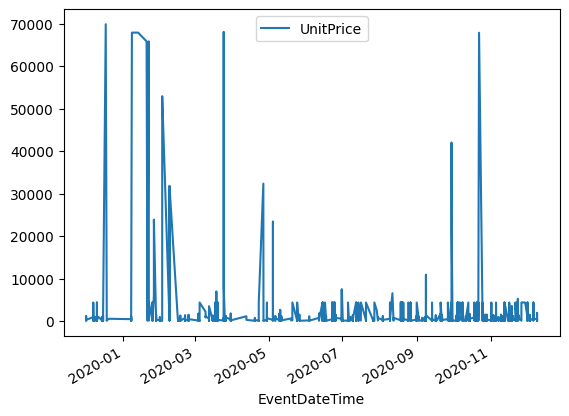

In [ ]:
# Order history of a particular user
df[df["UserID"] == 27256][["UnitPrice", "EventDateTime"]].plot(x='EventDateTime', y="UnitPrice")

In [ ]:
# Count of orders of products of a particular user
df[df["UserID"] == 27256].groupby(["ProductID","ProductName","UnitPrice"]).agg({"EventID": "count"}).reset_index().rename(columns={"EventID": "Count of orders"}).sort_values(by="Count of orders",ascending=False)

,ProductID,ProductName,UnitPrice,Count of orders
56,12347C2,CARRIAGE,4370.15,64
1109,34768,REGENCY CAKESTAND 3 TIER,1129.40,33
1916,97336,60 TEATIME FAIRY CAKE CASES,63.00,31
893,34483,BAKING SET 9 PIECE RETROSPOT,445.80,23
364,33557,PACK OF 72 RETRO SPOT CAKE CASES,63.00,21
...,...,...,...,...
910,34508,HEART STRING MEMO HOLDER HANGING,271.80,1
907,34502,ANGEL DECORATION WITH LACE PADDED,89.10,1
906,34499,ANGEL DECORATION 3 BUTTONS,51.69,1
905,34498,ANGEL DECORATION STARS ON DRESS,51.69,1


<Axes: xlabel='EventDateTime'>

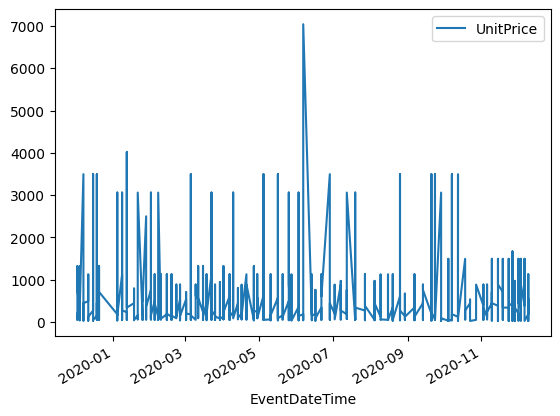

In [ ]:
# Order history of a particular user
df[df["UserID"] == 30186][["UnitPrice", "EventDateTime"]].plot(x='EventDateTime', y="UnitPrice")

In [ ]:
# Count of products of a particular user
df[df["UserID"] == 30186].groupby(["ProductID","ProductName","UnitPrice"]).agg({"EventID": "count"}).reset_index().rename(columns={"EventID": "Count of orders"}).sort_values(by="Count of orders",ascending=False)

,ProductID,ProductName,UnitPrice,Count of orders
1293,91505,HEART SHAPE WIRELESS DOORBELL,197.85,52
577,34280,SUKI SHOULDER BAG,158.70,36
641,34432,PAPER BUNTING WHITE LACE,271.80,35
657,34459,HOT WATER BOTTLE TEA AND SYMPATHY,358.80,34
576,34279,SKULL SHOULDER BAG,158.70,28
...,...,...,...,...
820,34761,36 DOILIES SPACEBOY DESIGN,141.30,1
822,34764,LIPSTICK PEN RED,51.69,1
823,34765,LIPSTICK PEN BABY PINK,51.69,1
824,34766,LIPSTICK PEN FUSCHIA,51.69,1


In [ ]:
df.head()

,EventID,EventType,ProductID,ProductName,Quantity,EventDateTime,UnitPrice,UserID,EncodedEventType
0,612890,Purchased,97393,DIWALI LANTERN WITH CARDBOARD,32,2019-12-01 07:45:00,624.80,25430,1
1,612890,Purchased,91668P,FLOWER POTS WITH FLOWER,32,2019-12-01 07:45:00,607.40,25430,1
2,612890,Purchased,91668W,RED COLORED LIGHTS,32,2019-12-01 07:45:00,607.40,25430,1
3,612890,Purchased,34386,PHOTO FRAME,68,2019-12-01 07:45:00,197.85,25430,1
4,612890,Purchased,33577,FUNNY HAT,44,2019-12-01 07:45:00,123.90,25430,1


In [ ]:
# Count of orders of products returned of a particular user
df[(df["UserID"] == 27256) & (df["EventType"] == "Returned")].groupby(["ProductID","ProductName","UnitPrice"]).agg({"EventID": "count"}).reset_index().rename(columns={"EventID": "Count of orders"}).sort_values(by="Count of orders",ascending=False)

,ProductID,ProductName,UnitPrice,Count of orders
54,34768,REGENCY CAKESTAND 3 TIER,972.80,3
80,35115,MIRROR CORNICE,1320.80,2
41,34483,BAKING SET 9 PIECE RETROSPOT,445.80,2
23,34003,GLASS BEURRE DISH,358.80,2
19,33872,RED RETROSPOT TRADITIONAL TEAPOT,711.80,2
...,...,...,...,...
37,34415,SMALL RED RETROSPOT MUG IN BOX,341.40,1
36,34406,LARGE CAKE STAND HANGING STRAWBERY,885.80,1
35,34257,VINTAGE SNAKES & LADDERS,341.40,1
34,34234,WOODEN BOX OF DOMINOES,123.90,1


In [ ]:
# Count of orders of products purchased of a particular user
df[(df["UserID"] == 27256) & (df["EventType"] == "Purchased")].groupby(["ProductID","ProductName","UnitPrice"]).agg({"EventID": "count"}).reset_index().rename(columns={"EventID": "Count of orders"}).sort_values(by="Count of orders",ascending=False)

,ProductID,ProductName,UnitPrice,Count of orders
56,12347C2,CARRIAGE,4370.15,64
1105,34768,REGENCY CAKESTAND 3 TIER,1129.40,32
1909,97336,60 TEATIME FAIRY CAKE CASES,63.00,31
363,33557,PACK OF 72 RETRO SPOT CAKE CASES,63.00,21
889,34483,BAKING SET 9 PIECE RETROSPOT,445.80,21
...,...,...,...,...
890,34484,RETRO SPOT TEA SET CERAMIC 11 PC,363.15,1
888,34483,BAKING SET 9 PIECE RETROSPOT,384.90,1
886,34480,LADLE LOVE HEART PINK,51.69,1
884,34478,PINK LOVE HEART SHAPE CUP,89.10,1


In [ ]:
previous_purchases = grouped_data.size().rename('PreviousPurchases')
previous_purchases

UserID
24691     46
24692     71
24693     20
24694    107
24696     21
        ... 
30628    230
30629     29
30630     12
30631     70
30632     86
Name: PreviousPurchases, Length: 4383, dtype: int64

In [ ]:
average_purchase_value = (total_spent / previous_purchases).rename('AveragePurchaseValue').sort_values()
average_purchase_value

UserID
26448        15.15
27172        15.15
26032        28.32
26378        31.68
27190        36.90
           ...    
29326    402034.97
28194    511261.73
28105    585156.92
25263    952974.65
29744   2184684.98
Name: AveragePurchaseValue, Length: 4383, dtype: float64

In [ ]:
# Total amount spent by each user
grouped_data = df.groupby('UserID')
total_spent = grouped_data['UnitPrice'].sum().rename('TotalSpent').sort_values()
total_spent

UserID
27172        15.15
26448        15.15
26378        31.68
27190        36.90
27245        40.38
           ...    
26501   2644135.11
25263   2858923.95
28105   2925784.60
26408   3473859.25
27256   3597375.30
Name: TotalSpent, Length: 4383, dtype: float64

In [ ]:
# Frequency of purchases
frequency_of_purchases = grouped_data['EventID'].nunique().rename('FrequencyOfPurchases')
frequency_of_purchases

UserID
24691    15
24692     2
24693     1
24694     4
24696     1
         ..
30628     6
30629     2
30630     1
30631     3
30632     5
Name: FrequencyOfPurchases, Length: 4383, dtype: int64

In [ ]:
user_features = pd.concat([previous_purchases, total_spent, average_purchase_value, frequency_of_purchases], axis=1)
user_features.reset_index(inplace=True)
user_features

,UserID,PreviousPurchases,TotalSpent,AveragePurchaseValue,FrequencyOfPurchases
0,24691,46,51169.22,1112.37,15
1,24692,71,15262.30,214.96,2
2,24693,20,1554.93,77.75,1
3,24694,107,80046.68,748.10,4
4,24696,21,4626.17,220.29,1
...,...,...,...,...,...
4378,30628,230,46951.84,204.14,6
4379,30629,29,10549.18,363.76,2
4380,30630,12,8919.20,743.27,1
4381,30631,70,27820.35,397.43,3


In [ ]:
df = pd.merge(df, user_features, on='UserID', how='left')
df

,EventID,EventType,ProductID,ProductName,Quantity,EventDateTime,UnitPrice,UserID,EncodedEventType,PreviousPurchases,TotalSpent,AveragePurchaseValue,FrequencyOfPurchases
0,612890,Purchased,97393,DIWALI LANTERN WITH CARDBOARD,32,2019-12-01 07:45:00,624.80,25430,1,63,91621.24,1454.31,7
1,612890,Purchased,91668P,FLOWER POTS WITH FLOWER,32,2019-12-01 07:45:00,607.40,25430,1,63,91621.24,1454.31,7
2,612890,Purchased,91668W,RED COLORED LIGHTS,32,2019-12-01 07:45:00,607.40,25430,1,63,91621.24,1454.31,7
3,612890,Purchased,34386,PHOTO FRAME,68,2019-12-01 07:45:00,197.85,25430,1,63,91621.24,1454.31,7
4,612890,Purchased,33577,FUNNY HAT,44,2019-12-01 07:45:00,123.90,25430,1,63,91621.24,1454.31,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
417529,661627,Purchased,34616,FELTCRAFT DOLL ROSIE,12,2020-12-09 20:01:00,271.80,29875,1,165,38698.04,234.53,4
417530,661627,Purchased,35095,FELTCRAFT PRINCESS LOLA DOLL,11,2020-12-09 20:01:00,341.40,29875,1,165,38698.04,234.53,4
417531,661627,Purchased,35096,FELTCRAFT PRINCESS OLIVIA DOLL,11,2020-12-09 20:01:00,341.40,29875,1,165,38698.04,234.53,4
417532,661627,Purchased,33315,PINK FLORAL FELTCRAFT SHOULDER BAG,12,2020-12-09 20:01:00,341.40,29875,1,165,38698.04,234.53,4


In [ ]:
columns_to_drop = ['PreviousPurchases_x', 'TotalSpent_x', 'AveragePurchaseValue_x', 'FrequencyOfPurchases_x']
df.drop(columns=columns_to_drop, inplace=True)


KeyError: "['PreviousPurchases_x', 'TotalSpent_x', 'AveragePurchaseValue_x', 'FrequencyOfPurchases_x'] not found in axis"

In [ ]:
df = df.loc[:, ~df.columns.duplicated()]
df.columns = df.columns.str.replace('_y', '')
df

,EventID,EventType,ProductID,ProductName,Quantity,EventDateTime,UnitPrice,UserID,EncodedEventType,PreviousPurchases,TotalSpent,AveragePurchaseValue,FrequencyOfPurchases
0,612890,Purchased,97393,DIWALI LANTERN WITH CARDBOARD,32,2019-12-01 07:45:00,624.80,25430,1,63,91621.24,1454.31,7
1,612890,Purchased,91668P,FLOWER POTS WITH FLOWER,32,2019-12-01 07:45:00,607.40,25430,1,63,91621.24,1454.31,7
2,612890,Purchased,91668W,RED COLORED LIGHTS,32,2019-12-01 07:45:00,607.40,25430,1,63,91621.24,1454.31,7
3,612890,Purchased,34386,PHOTO FRAME,68,2019-12-01 07:45:00,197.85,25430,1,63,91621.24,1454.31,7
4,612890,Purchased,33577,FUNNY HAT,44,2019-12-01 07:45:00,123.90,25430,1,63,91621.24,1454.31,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
417529,661627,Purchased,34616,FELTCRAFT DOLL ROSIE,12,2020-12-09 20:01:00,271.80,29875,1,165,38698.04,234.53,4
417530,661627,Purchased,35095,FELTCRAFT PRINCESS LOLA DOLL,11,2020-12-09 20:01:00,341.40,29875,1,165,38698.04,234.53,4
417531,661627,Purchased,35096,FELTCRAFT PRINCESS OLIVIA DOLL,11,2020-12-09 20:01:00,341.40,29875,1,165,38698.04,234.53,4
417532,661627,Purchased,33315,PINK FLORAL FELTCRAFT SHOULDER BAG,12,2020-12-09 20:01:00,341.40,29875,1,165,38698.04,234.53,4


**Create Recency Frequency Monetary (RFM) table**

In [ ]:
# Calculate Recency
print('Start date:' , df['EventDateTime'].min())
print('End date:' , df['EventDateTime'].max())


Start date: 2019-12-01 07:45:00
End date: 2020-12-09 20:01:00


In [ ]:
# Create revenue colummn
df['Revenue'] = df['UnitPrice'] * df['Quantity']
# Convert to show date only
from datetime import datetime
df["EventDateTime"] = df["EventDateTime"].dt.date

In [ ]:
import datetime as dt
snapshot_date = max(df.EventDateTime) + dt.timedelta(days=1)

In [ ]:
# RFM table
# Aggregate data by each customer
rfm = df.groupby('UserID').agg({'EventDateTime': lambda x: (snapshot_date - x.max()).days, 'EventID': lambda x: len(x), 'Revenue': lambda x: x.sum()}).reset_index()
rfm['EventDateTime'] = rfm['EventDateTime'].astype(int)

# Rename columns
rfm.rename(columns={'EventDateTime': 'Recency',
                         'EventID': 'Frequency',
                         'Revenue': 'MonetaryValue'}, inplace=True)

In [ ]:
rfm.head()

,UserID,Recency,Frequency,MonetaryValue
0,24691,67,46,510969.34
1,24692,3,71,333170.74
2,24693,74,20,55055.97
3,24694,43,107,1122543.73
4,24696,11,21,86863.96


In [ ]:
rfm[rfm['MonetaryValue'] < 0]

,UserID,Recency,Frequency,MonetaryValue
826,25873,319,1,-1395.90
2663,28342,253,1,-369.60


**Manage Skewness and Scaling**

The data should meet assumptions where the variables are not skewed and have the same mean and variance.

Because of that, we have to manage the skewness of the variables.

Here are the visualizations of each variable:

**Explore the data**

Recency, Frequency,MonetaryValue distributions



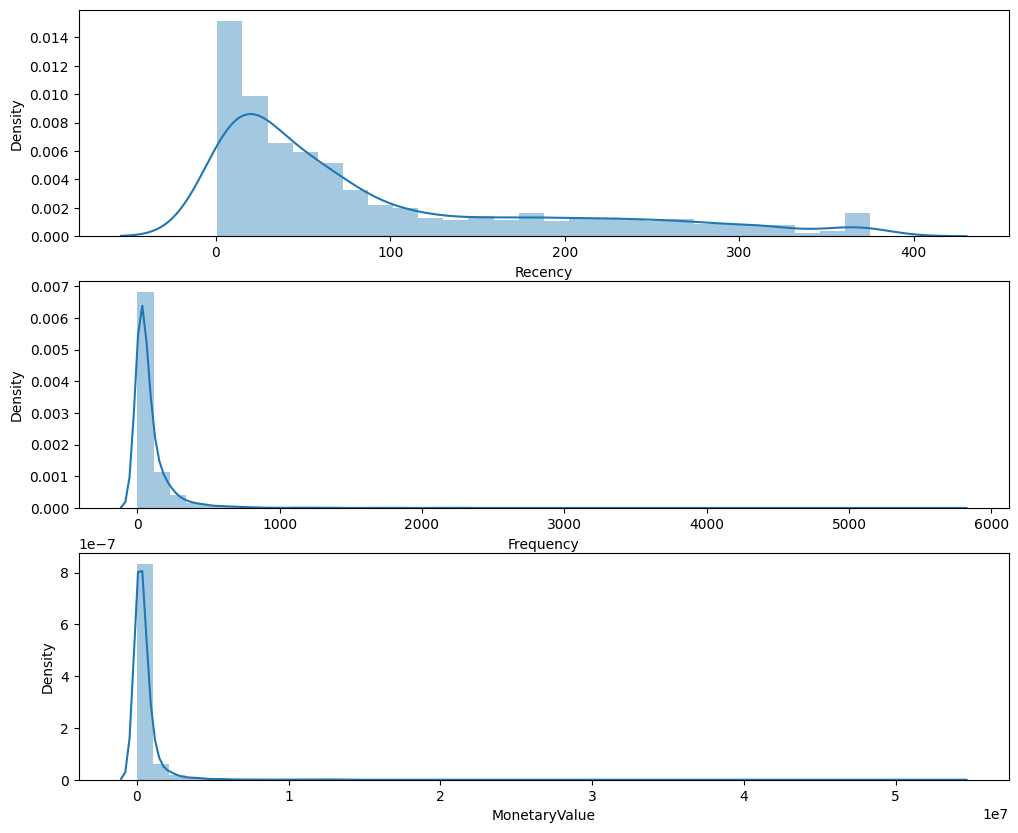

In [ ]:
plt.figure(figsize=(12,10))

# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(rfm['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(rfm['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(rfm['MonetaryValue'])

# Show the plot
plt.show()

As we can see from above, we have to transform the data, so it has a more symmetrical form. There are some methods that we can use to manage the skewness:

1. log transformation
2. square root transformation
3. box-cox transformation Note: We can use the transformation if and only if the variable only has positive values.



In [ ]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(rfm[x], ax=ax[0,0])
    sns.distplot(np.log(rfm[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(rfm[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(rfm[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()

#   print(rfm[x].skew().round(2))
#   print(np.log(rfm[x]).skew().round(2))
#   print(np.sqrt(rfm[x]).skew().round(2))
#   print(pd.Series(stats.boxcox(rfm[x])[0]).skew().round(2))

    print('Log Transform : The skew coefficient of', rfm[x].skew().round(2), 'to', np.log(rfm[x]).skew().round(2))
    print('Square Root Transform : The skew coefficient of', rfm[x].skew().round(2), 'to', np.sqrt(rfm[x]).skew().round(2))
    print('Box-Cox Transform : The skew coefficient of', rfm[x].skew().round(2), 'to', pd.Series(stats.boxcox(rfm[x])[0]).skew().round(2))

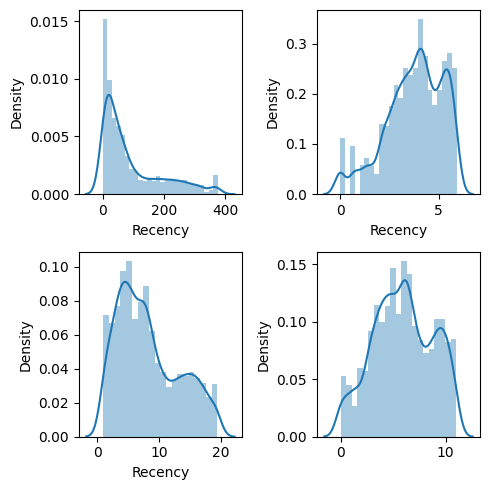

Log Transform : The skew coefficient of 1.28 to -0.63
Square Root Transform : The skew coefficient of 1.28 to 0.59
Box-Cox Transform : The skew coefficient of 1.28 to -0.07


In [ ]:
analyze_skewness('Recency')

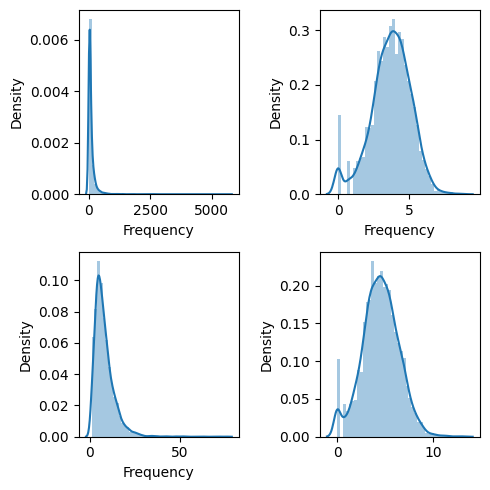

Log Transform : The skew coefficient of 12.79 to -0.4
Square Root Transform : The skew coefficient of 12.79 to 2.65
Box-Cox Transform : The skew coefficient of 12.79 to 0.01


In [ ]:
analyze_skewness('Frequency')

Based on that visualization, it shows that the variables with box-cox transformation shows a more symmetrical form rather than the other transformations. To make sure, we calculate each variable using the skew function. The result:

**Recency**



1. Log Transform : The skew coefficient of 1.28 to -0.63
2. Square Root Transform : The skew coefficient of 1.28 to 0.59
3. Box-Cox Transform : The skew coefficient of 1.28 to -0.07

**Frequency**

1. Log Transform : The skew coefficient of 12.79 to -0.4
2. Square Root Transform : The skew coefficient of 12.79 to 2.65
3. Box-Cox Transform : The skew coefficient of 12.79 to 0.01

Based on that calculation, we will utilize variables that use box-cox transformations. Except for the MonetaryValue variable because the variable includes negative values. To handle this variable, we can use cubic root transformation to the data.

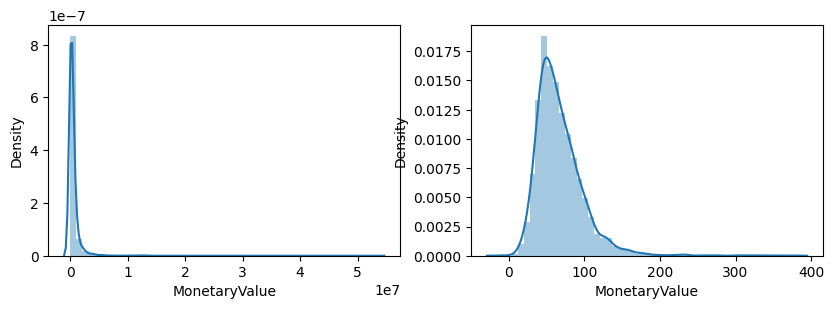

16.69
2.21


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
sns.distplot(rfm['MonetaryValue'], ax=ax[0])
sns.distplot(np.cbrt(rfm['MonetaryValue']), ax=ax[1])
plt.show()
print(rfm['MonetaryValue'].skew().round(2))
print(np.cbrt(rfm['MonetaryValue']).skew().round(2))

In [ ]:
pd.Series(np.cbrt(rfm['MonetaryValue'])).values

array([79.94628373, 69.32485201, 38.04242031, ..., 51.14679608,
       75.63311808, 80.87238555])

In [ ]:
# Set the Numbers
from scipy import stats
customers_fix = pd.DataFrame()
customers_fix["Recency"] = stats.boxcox(rfm['Recency'])[0]
customers_fix["Frequency"] = stats.boxcox(rfm['Frequency'])[0]
customers_fix["MonetaryValue"] = pd.Series(np.cbrt(rfm['MonetaryValue'])).values
customers_fix.tail()

,Recency,Frequency,MonetaryValue
4378,3.86,7.00,81.09
4379,6.38,3.93,54.98
4380,10.30,2.78,51.15
4381,7.66,5.17,75.63
4382,3.86,5.47,80.87


In [ ]:
s_df= pd.DataFrame({
    'Recency': [3.86, 6.38, 10.30, 7.66, 3.86],
    'Frequency': [7.00,3.93,2.78,5.17,5.47],
    'MonetaryValue': [781.09,54.98,51.15,75.63,80.87]
})
mean_var = s_df.agg(['mean', 'var'])
mean_var

,Recency,Frequency,MonetaryValue
mean,6.41,4.87,208.74
var,7.43,2.56,102532.57


From the aboe table we can see that each variable doesn't have the same mean and variance. We have to normalize it for a fair comparison between variables. When variables have different scales or spreads, it can be misleading to directly compare their values. Normalization ensures that each variable is on the same scale, making comparisons more meaningful. To normalize, we can use StandardScaler object from scikit-learn library to do it. The code will look like this:

In [ ]:
# Import library
from sklearn.preprocessing import StandardScaler
# Initialize the Object
scaler = StandardScaler()
# Fit and Transform The Data
scaler.fit(customers_fix)
customers_normalized = scaler.transform(customers_fix)
# Assert that it has mean 0 and variance 1
print(customers_normalized.mean(axis = 0).round(2))
print(customers_normalized.std(axis = 0).round(2))

[ 0.  0. -0.]
[1. 1. 1.]


In [ ]:
pd.DataFrame(customers_normalized).head()

,0,1,2
0,0.20,0.03,0.40
1,-1.66,0.36,0.07
2,0.28,-0.56,-0.93
3,-0.14,0.68,1.17
4,-1.01,-0.52,-0.73


In [ ]:
normalized_data = pd.DataFrame({
    0: [0.20, -1.66, 0.28, -0.14, -1.01],
    1: [0.03, 0.36, -0.56, 0.68, -0.52],
    2: [0.40, 0.07, -0.93, 1.17, -0.73]
})

mean_var = normalized_data.agg(['mean', 'var'])
mean_var

,0,1,2
mean,-0.47,-0.00,-0.00
var,0.71,0.29,0.73


Now, we can do clustering using that data.

**Clustering with K-means algorithm**

K-means clustering is a method used to group similar data points into a fixed number of clusters. The algorithm divides a dataset into 'k' clusters, where 'k' is a predetermined number chosen by the user. It works by iteratively assigning each data point to the nearest cluster center and then recalculating the cluster centers based on the mean of the data points assigned to each cluster. This process continues until the cluster centers no longer change significantly, or a specified number of iterations is reached. The result is a partitioning of the data into 'k' clusters, where each data point belongs to the cluster with the nearest mean.

**Determine the Optimal K**

To make our clustering reach its maximum performance, we have to determine which hyperparameter fits to the data. To determine which hyperparameter is the best for our model and data, we can use the elbow method to decide

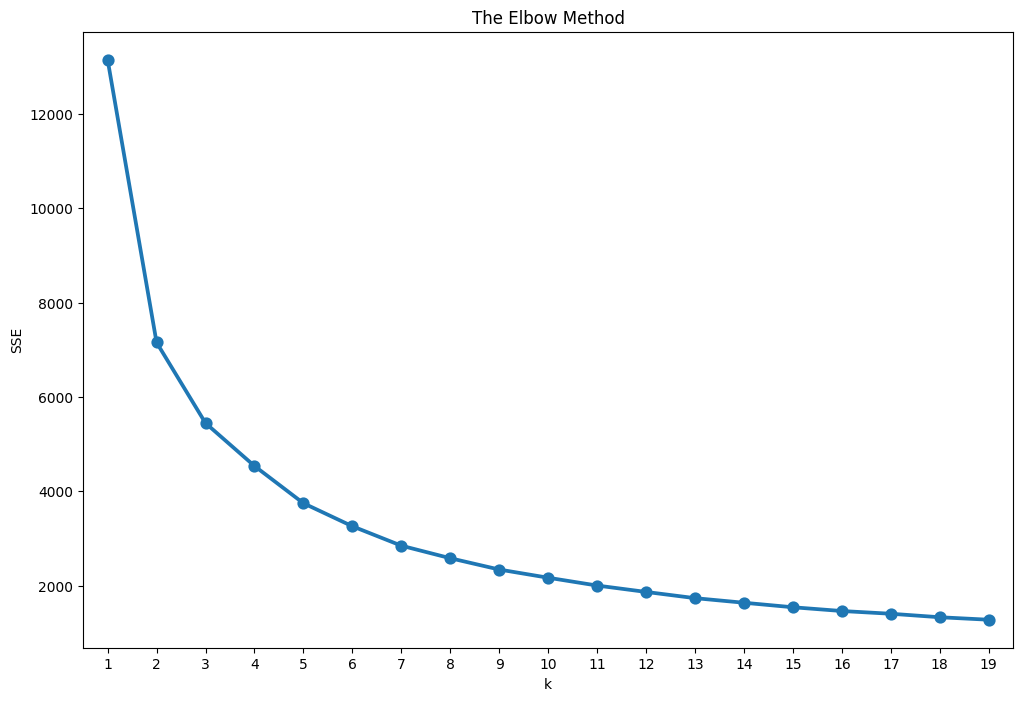

In [ ]:
plt.figure(figsize=(12,8))

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
K = range(1, 20)

distortions = []
inertias = []
mapping1 = {}
sse = {}
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)

    distortions.append(sum(np.min(cdist(customers_normalized, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / customers_normalized.shape[0])
    inertias.append(kmeans.inertia_)

    mapping1[k] = sum(np.min(cdist(customers_normalized, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / customers_normalized.shape[0]

    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [ ]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 1.493080067134008
2 : 1.1056360681368778
3 : 0.9537038381906531
4 : 0.8592908199092667
5 : 0.7942770216003133
6 : 0.7342139361227358
7 : 0.7012467497997572
8 : 0.6679437596355293
9 : 0.6323582155873777
10 : 0.6229187589363692
11 : 0.5977499852744061
12 : 0.5739038344145245
13 : 0.5532986589308411
14 : 0.5328279714053833
15 : 0.5190677010041403
16 : 0.514059763157684
17 : 0.5006158713149941
18 : 0.48764488714479526
19 : 0.47629648913420075


The x-axis is the value of the k, and the y-axis is the SSE value of the data. We will take the best parameter by looking at where the k-value will have a linear trend on the next consecutive k. From the above plot, the k-value of 3 or 4 is the best hyperparameter for our model because the next k-value tend to have a linear trend.

Comparing the clustering performance. For this purpose, we have calculated the mean values of recency, frequency, and monetary metrics to get the following result:



**Fit the model** - 3 clusters

In [ ]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(customers_normalized)
model.labels_.shape

(4383,)

In [ ]:
rfm.shape

(4383, 4)

By fitting the model, we can have clusters where each data belongs. By that, we can analyze the data.

In [ ]:
rfm["Cluster"] = model.labels_
rfm.head()

,UserID,Recency,Frequency,MonetaryValue,Cluster
0,24691,67,46,510969.34,0
1,24692,3,71,333170.74,0
2,24693,74,20,55055.97,1
3,24694,43,107,1122543.73,2
4,24696,11,21,86863.96,0


In [ ]:
rfm.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         43.50     60.60     303573.50  1885
1        186.80     19.50     132216.90  1586
2         24.70    298.50    1887058.00   912

**Fit the model** - 4 cluster

In [ ]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(customers_normalized)
model.labels_.shape

rfm["Cluster"] = model.labels_
rfm.head()
rfm.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0        218.40     22.10     146544.90  1284
1         47.90    104.30     510603.00  1467
2         37.90     22.50     129374.70  1083
3         16.60    385.60    2596717.60   549

From the above table, we can compare the distribution of mean values of recency, frequency, and monetary metrics across 3 and 4 cluster data. It seems that we get a more detailed distribution of our customer base using k=4. However, this may not be a very visually appealing method to extract insights.

Another commonly used method to compare the cluster segments is Snakeplots. They are commonly used in marketing research to understand customer perceptions.

Let us build a snake plot for our data with 4 clusters below.

**Cluster Exploration and Visualization**


Snake Plots

Besides that, we can analyze the segments using snake plot. It requires the normalized dataset and also the cluster labels. By using this plot, we can have a good visualization from the data on how the cluster differs from each other

In [ ]:
# Create the dataframe
df_normalized = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = rfm.index
df_normalized['Cluster'] = model.labels_
df_normalized.head()

,Recency,Frequency,MonetaryValue,ID,Cluster
0,0.20,0.03,0.40,0,1
1,-1.66,0.36,0.07,1,1
2,0.28,-0.56,-0.93,2,2
3,-0.14,0.68,1.17,3,1
4,-1.01,-0.52,-0.73,4,2


In [ ]:
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()

,ID,Cluster,Attribute,Value
0,0,1,Recency,0.20
1,1,1,Recency,-1.66
2,2,2,Recency,0.28
3,3,1,Recency,-0.14
4,4,2,Recency,-1.01


In [ ]:
df_nor_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13149 entries, 0 to 13148
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         13149 non-null  int64  
 1   Cluster    13149 non-null  int32  
 2   Attribute  13149 non-null  object 
 3   Value      13149 non-null  float64
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 359.7+ KB


In [ ]:
# Aggregate data by each customer
fig3 = df_nor_melt.groupby('Cluster').agg({'ID': lambda x: len(x)}).reset_index()


# Rename columns
fig3.rename(columns={'ID': 'Count'}, inplace=True)
fig3['percent'] = (fig3['Count'] / fig3['Count'].sum()) * 100
fig3['percent'] = fig3['percent'].round(1)

fig3.head()

,Cluster,Count,percent
0,0,3852,29.30
1,1,4401,33.50
2,2,3249,24.70
3,3,1647,12.50


In [ ]:
#Creating a Treemap with Plotly Express
# colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'] #color palette
colors=['#bad0af','#d5e0cf','#f1f1f1','#f1d4d4'] #color palette
import plotly.express as px

fig = px.treemap(fig3, path=['Cluster'],values='Count'
                 , width=800, height=400
                 ,title="Distribution of Cluster")

fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))

fig.data[0].textinfo = 'label+text+value+percent root'
fig.show()

<Axes: xlabel='Attribute', ylabel='Value'>

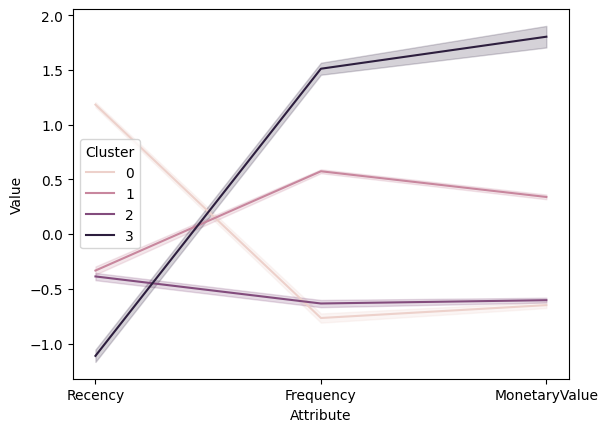

In [ ]:
# Visualising it
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=df_nor_melt)

From the above snake plot, we can see the distribution of recency, frequency, and monetary metric values across the four clusters. The four clusters seem to be separate from each other, which indicates a good heterogeneous mix of clusters.

**Comparing the different of rfm between population and clusters**

In [ ]:
rfm.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0        218.40     22.10     146544.90  1284
1         47.90    104.30     510603.00  1467
2         37.90     22.50     129374.70  1083
3         16.60    385.60    2596717.60   549

In [ ]:
cluster_avg = rfm.groupby('Cluster').mean()
population_avg = rfm.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp

,Cluster,Frequency,MonetaryValue,Recency,UserID
Cluster,,,,,
0,NaN,-0.77,-0.74,1.39,0.00
1,NaN,0.10,-0.11,-0.48,-0.00
2,NaN,-0.76,-0.77,-0.59,0.00
3,NaN,3.05,3.55,-0.82,-0.00


**Scatter Plot**

The scatter plot is the data analysis method we use when we have more than two variables. Remove the outlier from the plot to create a clear visualization result. Those outliers are taken into consideration in the model development. Exclude them only for visualization purposes.

In [ ]:
rfm_fig = rfm.copy()

#Remove the outlier for visualization
y1 = rfm_fig['Frequency']
size = rfm_fig.shape[0]
removed_outliers = y1.between(y1.quantile(.05), y1.quantile(.95))
print(str(y1[removed_outliers].size) + "/" + str(size) + " data points remain.")
index_names = rfm_fig[~removed_outliers].index
rfm_fig.drop(index_names, inplace=True)

#Remove the outlier for visualization
y2 = rfm_fig['Recency']
size = rfm_fig.shape[0]
removed_outliers = y2.between(y2.quantile(.05), y2.quantile(.95))
print(str(y2[removed_outliers].size) + "/" + str(size) + " data points remain.")
index_names = rfm_fig[~removed_outliers].index
rfm_fig.drop(index_names, inplace=True)

#Remove the outlier for visualization
y3 = rfm_fig['MonetaryValue']
size = rfm_fig.shape[0]
removed_outliers = y3.between(y3.quantile(.05), y3.quantile(.95))
print(str(y3[removed_outliers].size) + "/" + str(size) + " data points remain.")
index_names = rfm_fig[~removed_outliers].index
rfm_fig.drop(index_names, inplace=True)

3973/4383 data points remain.
3592/3973 data points remain.
3232/3592 data points remain.


**Recency Vs frequency**

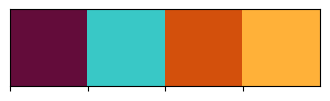

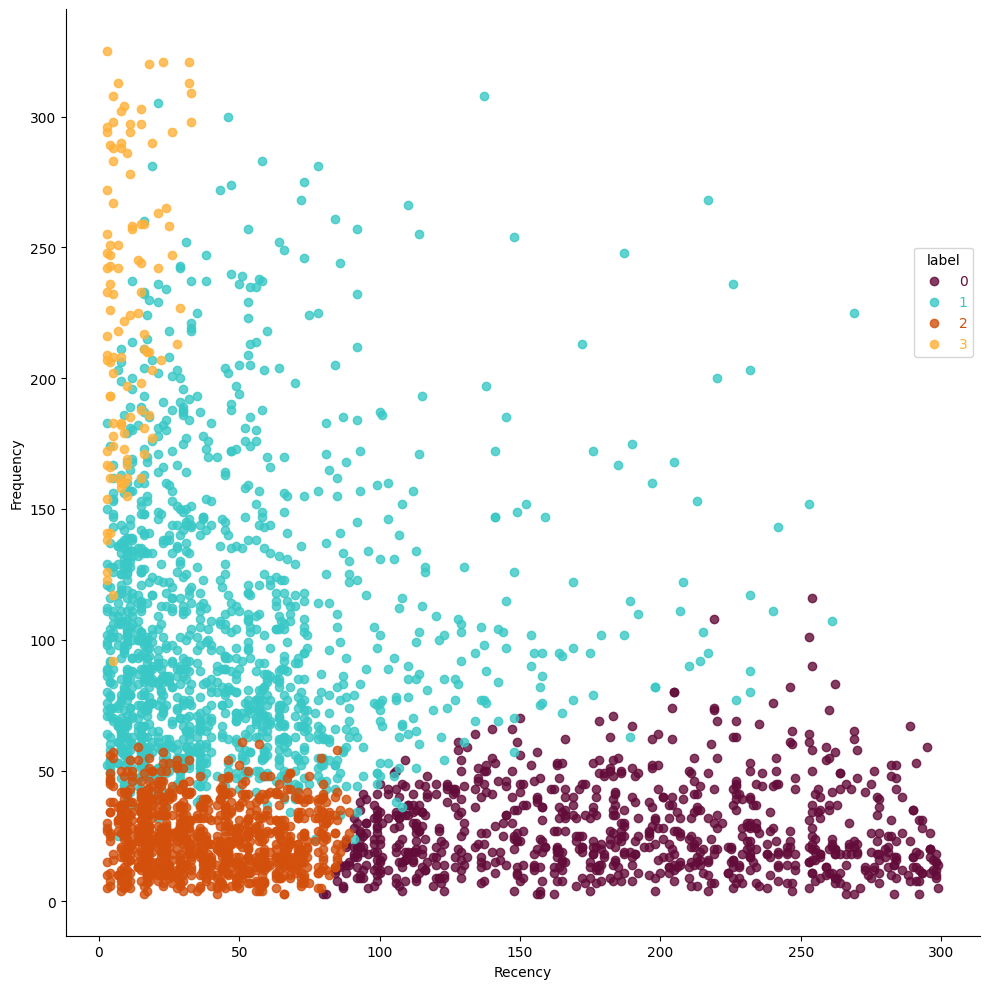

In [ ]:
#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)

data = pd.DataFrame(data=rfm_fig,columns=['Customer ID','Cluster','Recency','Frequency','MonetaryValue'])

#plot data with seaborn (don't add a legend yet)
facet = sns.lmplot(data=data, x='Recency', y='Frequency', hue='Cluster', height=10,
                   fit_reg=False, legend=False)

#add a legend
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="label", fancybox=True)
#change colors of labels
for i, text in enumerate(leg.get_texts()):
    plt.setp(text, color = customPalette[i])

**Frequency Vs Monetary**

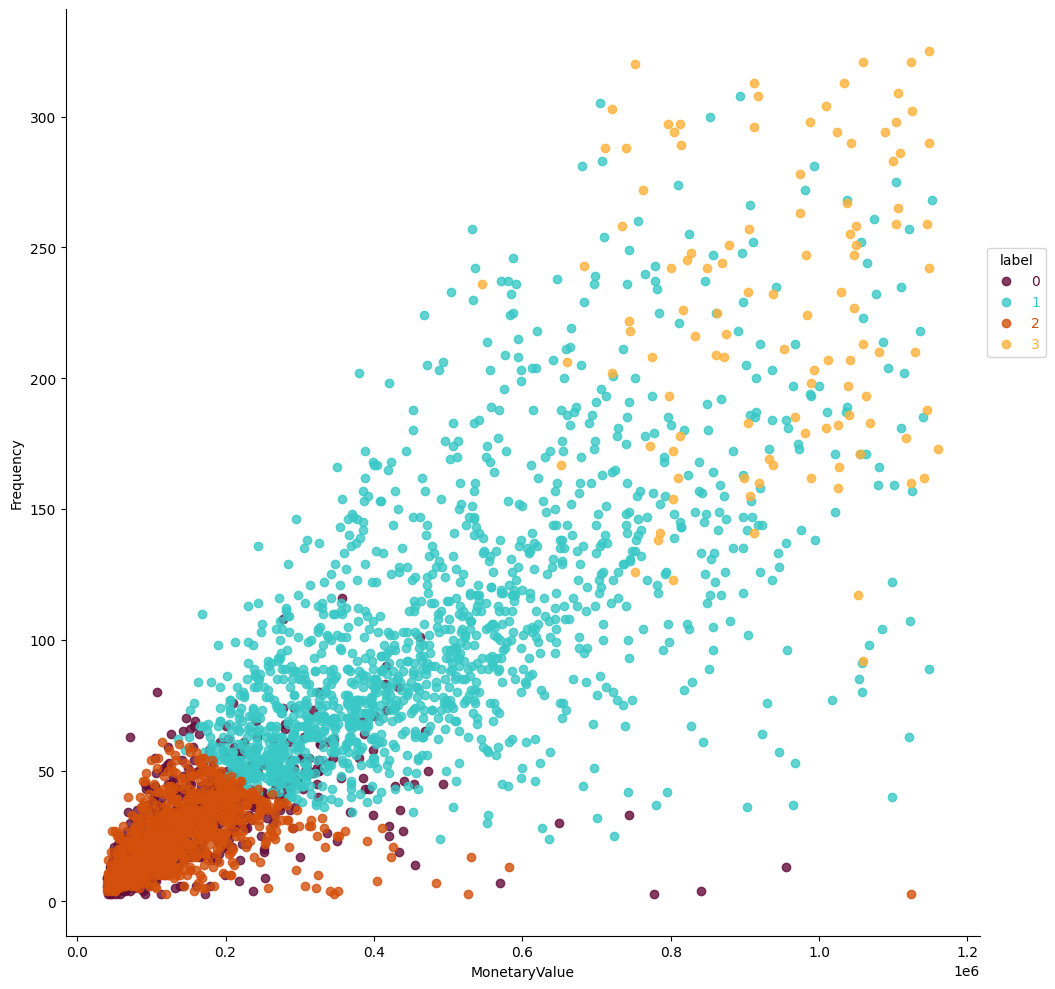

In [ ]:
# fig, ax = plt.subplots(figsize=(10, 8))
#plot data with seaborn (don't add a legend yet)
facet = sns.lmplot(data=data, x='MonetaryValue', y='Frequency', hue='Cluster', height=10,
                   fit_reg=False, legend=False)

#add a legend
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="label", fancybox=True)
#change colors of labels
for i, text in enumerate(leg.get_texts()):
    plt.setp(text, color = customPalette[i])

In [ ]:
cluster_avg = rfm[['Cluster','Recency','Frequency','MonetaryValue']].groupby(['Cluster']).mean()
population_avg = rfm[['Recency','Frequency','MonetaryValue']].head().mean()

In [ ]:
cluster_avg

,Recency,Frequency,MonetaryValue
Cluster,,,
0,218.44,22.13,146544.90
1,47.89,104.34,510602.96
2,37.88,22.47,129374.70
3,16.61,385.63,2596717.55


In [ ]:
population_avg

Recency             39.60
Frequency           53.00
MonetaryValue   421720.75
dtype: float64

In [ ]:
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,4.52,-0.58,-0.65
1,0.21,0.97,0.21
2,-0.04,-0.58,-0.69
3,-0.58,6.28,5.16


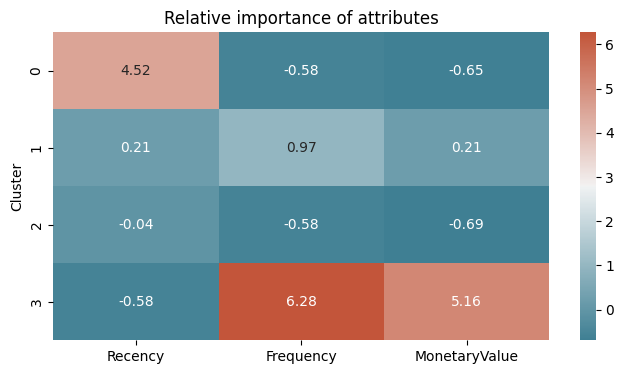

In [ ]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)
# Plot heatmap
plt.figure(figsize=(8, 4))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap=cmap)
plt.show()

**Using the RFM segmentation to identify the type of customer according to RFM score**

**Getting the individual RFM scores**

Getting the individual RFM score can be done in several ways. You could use your own business expertise and heuristics to make rankings that suit your customer base. For this case, we are going to go the statistical route and rank our customer using quartiles.

The ranking of the individual RFM scores is done by dividing each of the RFM values into quartiles which creates four more or less equal buckets. We then rank each bucket from one to four; four being the best. Our summary table should now look something like this:

**Define quartiles for RFM score:**

In [ ]:
# Create the quartiles scores
quantiles = rfm.quantile(q=[0.2,0.4,0.6,0.8])
quantiles = quantiles.to_dict()

def RScore(x,p,d):
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]:
        return 3
    elif x <= d[p][0.8]:
        return 2
    else:
        return 1

def FMScore(x,p,d):
    if x <= d[p][0.2]:
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]:
        return 3
    elif x <= d[p][0.8]:
        return 4
    else:
        return 5

rfm['R'] = rfm['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm['F'] = rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm['M'] = rfm['MonetaryValue'].apply(FMScore, args=('MonetaryValue',quantiles,))

**Calculate the overall RFM score**

This step can be done in two ways:


Concatenation: creates segments Here we just concatenate (not add) the individual RFM score like strings and get labeled segments in return. Our best segment will be 444 and our worst will be 111 — signifying the lowest score on all three of the RFM categories.

Addition: creates a score Here we add the individual RFM scores like numbers and get a number in return indicating the customer score. The score will range from 3 to 12 and we can use this to create more human friendly labelled categories.

In [ ]:
# Concat RFM quartile values to create RFM Segments
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
rfm['RFM_Segment'] = rfm.apply(join_rfm, axis=1)
# Calculate RFM_Score
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

In [ ]:
rfm['RFM_Segment'].unique()

array(['3.03.04.0', '5.04.04.0', '2.02.01.0', '3.04.05.0', '5.02.02.0',
       '3.02.01.0', '1.02.02.0', '4.04.05.0', '4.05.05.0', '5.03.04.0',
       '2.02.02.0', '1.01.02.0', '1.01.01.0', '1.02.03.0', '3.04.04.0',
       '1.03.03.0', '4.01.02.0', '4.04.04.0', '1.04.04.0', '3.03.03.0',
       '5.01.01.0', '3.01.01.0', '2.03.03.0', '2.05.05.0', '4.03.03.0',
       '1.04.03.0', '4.03.04.0', '2.01.02.0', '3.05.05.0', '3.02.02.0',
       '3.01.02.0', '2.02.04.0', '5.05.05.0', '4.02.03.0', '5.04.05.0',
       '4.02.02.0', '4.03.05.0', '3.02.03.0', '4.02.01.0', '2.04.04.0',
       '2.05.04.0', '5.03.03.0', '3.03.05.0', '1.01.03.0', '2.04.05.0',
       '1.03.02.0', '2.01.01.0', '5.02.05.0', '4.04.03.0', '4.05.04.0',
       '2.02.03.0', '4.02.05.0', '5.02.01.0', '2.03.04.0', '2.01.03.0',
       '1.03.04.0', '2.01.05.0', '2.03.02.0', '5.02.04.0', '5.02.03.0',
       '2.04.02.0', '4.01.04.0', '4.03.02.0', '1.02.01.0', '1.05.04.0',
       '3.05.04.0', '4.01.01.0', '3.04.03.0', '1.05.05.0', '1.01

After calculations on the RFM data we can create customer segments that are actionable and easy to understand — like the ones below:

* Champions: Bought recently, buy often and spend the most
* Loyal customers: Buy on a regular basis. Responsive to promotions.
* Potential loyalist: Recent customers with average frequency.
* Recent customers: Bought most recently, but not often.
* Promising: Recent shoppers, but haven’t spent much.
* Needs attention: Above average recency, frequency and monetary values. May not have bought very recently though.
* About to sleep: Below average recency and frequency. Will lose them if not reactivated.
* At risk: Some time since they’ve purchased. Need to bring them back!
* Can’t lose them: Used to purchase frequently but haven’t returned for a long time.
* Hibernating: Last purchase was long back and low number of orders. May be lost.




**Grouping and labelling with RFM label**

For the RFM segment we are going to use the most common naming scheme, as outlined above.

In [ ]:
# Create human friendly RFM labels
segt_map = {

    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At risk',
    r'[1-2]5': 'Can\'t lose them',
    r'3[1-2]': 'About to sleep',
    r'33': 'Need attention',
    r'[3-4][4-5]': 'Loyal customers',
    r'41': 'Promising',
    r'51': 'New customers',
    r'[4-5][2-3]': 'Potential loyalists',
    r'5[4-5]': 'Champions'
}
# rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)+ rfm['M'].map(str)
rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
# Create some human friendly labels for the scores
rfm['Score'] = 'Green'
rfm.loc[rfm['RFM_Score']>5,'Score'] = 'Bronze'
rfm.loc[rfm['RFM_Score']>7,'Score'] = 'Silver'
rfm.loc[rfm['RFM_Score']>9,'Score'] = 'Gold'
rfm.loc[rfm['RFM_Score']>10,'Score'] = 'Platinum'
# List the head of the table to view the
rfm.head(5)

,UserID,Recency,Frequency,MonetaryValue,Cluster,R,F,M,RFM_Segment,RFM_Score,Segment,Score
0,24691,67,46,510969.34,1,3,3,4,3.03.04.0,10,Need attention,Gold
1,24692,3,71,333170.74,1,5,4,4,5.04.04.0,13,Champions,Platinum
2,24693,74,20,55055.97,2,2,2,1,2.02.01.0,5,Hibernating,Green
3,24694,43,107,1122543.73,1,3,4,5,3.04.05.0,12,Loyal customers,Platinum
4,24696,11,21,86863.96,2,5,2,2,5.02.02.0,9,Potential loyalists,Silver
